In [21]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0277e459-981d-4870-a669-84e415dc3dea',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-10-16T16:28:31.811Z', 'error_code': 0, 'error_message': None, 'elapsed': 16, 'credit_count': 1, 'notice': None, 'total_count': 9874}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11776, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [23]:
type(data)

dict

In [75]:
import pandas as pd


pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [27]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')

In [29]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11776,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.976847e+07,1.976847e+07,...,57.7568,1.420968e+12,None,2024-10-16T16:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-16 12:28:36.450672
1,1027,Ethereum,ETH,ethereum,9423,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.203862e+08,1.203862e+08,...,13.5347,3.134231e+11,None,2024-10-16T16:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-16 12:28:36.450672
2,825,Tether USDt,USDT,tether,100423,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.199722e+11,1.213629e+11,...,5.1787,1.213280e+11,None,2024-10-16T16:26:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-10-16 12:28:36.450672
3,1839,BNB,BNB,bnb,2259,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.459317e+08,1.459317e+08,...,3.7397,8.659955e+10,None,2024-10-16T16:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-16 12:28:36.450672
4,5426,Solana,SOL,solana,767,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.698603e+08,5.867202e+08,...,3.1453,9.096051e+10,None,2024-10-16T16:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-16 12:28:36.450672
5,3408,USDC,USDC,usd-coin,22491,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.477012e+10,3.477012e+10,...,1.5012,3.476407e+10,None,2024-10-16T16:26:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-10-16 12:28:36.450672
6,52,XRP,XRP,xrp,1404,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.664506e+10,9.998714e+10,...,1.3422,5.487819e+10,None,2024-10-16T16:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-16 12:28:36.450672
7,74,Dogecoin,DOGE,dogecoin,1080,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.463923e+11,1.463923e+11,...,0.7990,1.850380e+10,None,2024-10-16T16:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-16 12:28:36.450672
8,1958,TRON,TRX,tron,1050,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,8.653253e+10,8.653261e+10,...,0.5965,1.381434e+10,None,2024-10-16T16:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-16 12:28:36.450672
9,11419,Toncoin,TON,toncoin,578,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2.539167e+09,5.113294e+09,...,0.5739,2.676080e+10,None,2024-10-16T16:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-16 12:28:36.450672


In [57]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0277e459-981d-4870-a669-84e415dc3dea',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    
    
    # Check if file exists or not, if not then create
    if not os.path.isfile(r'/Users/khushalvanani/Web/Automating Crypto/API.csv'):
        df.to_csv(r'/Users/khushalvanani/Web/Automating Crypto/API.csv', header = 'column_names')
    else:
        df.to_csv(r'/Users/khushalvanani/Web/Automating Crypto/API.csv', mode='a',header = False)

In [61]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print("API runner completed sucessfully")
    sleep(60)

exit()

API runner completed sucessfully
API runner completed sucessfully
API runner completed sucessfully
API runner completed sucessfully
API runner completed sucessfully


KeyboardInterrupt: 

In [87]:
df3 = pd.read_csv(r'/Users/khushalvanani/Web/Automating Crypto/API.csv')

df3

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11776,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19768468.00000,19768468.00000,False,NaN,1,NaN,NaN,NaN,2024-10-16T17:05:00.000Z,67717.62303,43556197689.05792,-5.56400,-0.15364,1.26685,9.76493,17.39669,13.48871,5.98263,1338673663831.52197,57.65440,1422070083552.35010,NaN,2024-10-16T17:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-16 13:07:00.692678
1,1,1027,Ethereum,ETH,ethereum,9423,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120386200.15205,120386200.15205,True,NaN,2,NaN,NaN,NaN,2024-10-16T17:05:00.000Z,2615.42609,18836989852.79494,-11.61050,0.24908,0.86582,7.70687,14.56185,-0.37808,-23.51723,314861209198.74414,13.55310,314861209198.73999,NaN,2024-10-16T17:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-16 13:07:00.692678
2,2,825,Tether USDt,USDT,tether,100424,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,119972176281.55080,121362937383.07552,True,NaN,3,NaN,NaN,NaN,2024-10-16T17:05:00.000Z,0.99972,70115205261.56113,-13.34670,-0.00598,-0.01820,0.03760,-0.02849,-0.05574,-0.03356,119938194010.66676,5.16550,121328561177.35001,NaN,2024-10-16T17:05:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-10-16 13:07:00.692678
3,3,1839,BNB,BNB,bnb,2259,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,145931747.23365,145931747.23365,False,NaN,4,NaN,NaN,NaN,2024-10-16T17:05:00.000Z,593.91334,1881492734.02062,-6.22760,-0.37390,0.27728,2.84561,11.59254,10.69356,4.02903,86670810930.68631,3.73070,86670810930.69000,NaN,2024-10-16T17:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-16 13:07:00.692678
4,4,5426,Solana,SOL,solana,767,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,469859950.15799,586719914.33582,True,NaN,5,NaN,NaN,NaN,2024-10-16T17:05:00.000Z,155.04985,2619387223.06498,-19.35950,-0.43230,-0.10191,10.26202,19.02930,9.65348,-1.60472,72851716392.05772,3.13760,90970836706.53999,NaN,2024-10-16T17:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-16 13:07:00.692678
5,5,3408,USDC,USDC,usd-coin,22491,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,34768533625.56929,34768533625.56929,False,NaN,6,NaN,NaN,NaN,2024-10-16T17:05:00.000Z,0.99983,7292267829.75622,-10.26480,-0.01090,-0.01769,-0.01635,-0.01930,-0.02514,-0.01856,34762771187.88735,1.49640,34762771187.89000,NaN,2024-10-16T17:05:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-10-16 13:07:00.692678
6,6,52,XRP,XRP,xrp,1404,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,56645058199.00000,99987139355.00000,False,NaN,7,NaN,NaN,NaN,2024-10-16T17:05:00.000Z,0.54882,1069631321.43804,-16.91040,0.06219,1.06730,3.20993,-4.97512,-3.79283,-3.58535,31087729951.65369,1.33890,54881627700.76000,NaN,2024-10-16T17:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-16 13:07:00.692678
7,7,74,Dogecoin,DOGE,dogecoin,1080,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,146392586383.70520,146392586383.70520,True,NaN,8,NaN,NaN,NaN,2024-10-16T17:05:00.000Z,0.12624,2130982677.51258,64.30890,-0.12762,9.88895,15.31785,27.14405,22.33136,5.58148,18480619647.43583,0.79590,18480619647.44000,NaN,2024-10-16T17:05

In [73]:
pd.set_option('display.float.format',lambda x: '%.5f' % x)

In [89]:
df4 = df3.groupby('name',sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()

In [91]:
df5 = df4.stack()
df5

name                                      
Bitcoin       quote.USD.percent_change_1h     -0.06211
              quote.USD.percent_change_24h     1.30097
              quote.USD.percent_change_7d      9.76745
              quote.USD.percent_change_30d    17.44553
              quote.USD.percent_change_60d    13.52704
              quote.USD.percent_change_90d     6.08158
Ethereum      quote.USD.percent_change_1h      0.25781
              quote.USD.percent_change_24h     0.85637
              quote.USD.percent_change_7d      7.62979
              quote.USD.percent_change_30d    14.59552
              quote.USD.percent_change_60d    -0.41234
              quote.USD.percent_change_90d   -23.46910
Tether USDt   quote.USD.percent_change_1h     -0.00399
              quote.USD.percent_change_24h    -0.00770
              quote.USD.percent_change_7d      0.04750
              quote.USD.percent_change_30d    -0.01812
              quote.USD.percent_change_60d    -0.04881
              quote.US

In [93]:
df6 = df5.to_frame(name="Values")
df6

Values
name                                               
Bitcoin      quote.USD.percent_change_1h   -0.06211
             quote.USD.percent_change_24h   1.30097
             quote.USD.percent_change_7d    9.76745
             quote.USD.percent_change_30d  17.44553
             quote.USD.percent_change_60d  13.52704
             quote.USD.percent_change_90d   6.08158
Ethereum     quote.USD.percent_change_1h    0.25781
             quote.USD.percent_change_24h   0.85637
             quote.USD.percent_change_7d    7.62979
             quote.USD.percent_change_30d  14.59552
             quote.USD.percent_change_60d  -0.41234
             quote.USD.percent_change_90d -23.46910
Tether USDt  quote.USD.percent_change_1h   -0.00399
             quote.USD.percent_change_24h  -0.00770
             quote.USD.percent_change_7d    0.04750
             quote.USD.percent_change_30d  -0.01812
             quote.USD.percent_change_60d  -0.04881
             quote.USD.percent_change_90d  -0.03198
BNB          quote.USD.percent_change_1h   -0.32928
             quote.USD.percent_change_24h   0.28799
             quote.USD.percent_change_7d    2.82476
             quote.USD.percent_change_30d  11.66105
             quote.USD.percent_change_60d  10.62624
             quote.USD.percent_change_90d   4.08410
Solana       quote.USD.percent_change_1h   -0.37655
             quote.USD.percent_change_24h  -0.03115
             quote.USD.percent_change_7d   10.26148
             quote.USD.percent_change_30d  19.10746
             quote.USD.percent_change_60d   9.58642
             quote.USD.percent_change_90d  -1.53813
USDC         quote.USD.percent_change_1h   -0.00281
             quote.USD.percent_change_24h  -0.00849
             quote.USD.percent_change_7d   -0.00953
             quote.USD.percent_change_30d  -0.00853
             quote.USD.percent_change_60d  -0.02031
             quote.USD.percent_change_90d  -0.01541
XRP          quote.USD.percent_change_1h    0.09439
             quote.USD.percent_change_24h   1.10829
             quote.USD.percent_change_7d    3.19975
             quote.USD.percent_change_30d  -4.93034
             quote.USD.percent_change_60d  -3.76528
             quote.USD.percent_change_90d  -3.55682
Dogecoin     quote.USD.percent_change_1h   -0.18469
             quote.USD.percent_change_24h   9.77169
             quote.USD.percent_change_7d   15.21418
             quote.USD.percent_change_30d  27.03778
             quote.USD.percent_change_60d  22.12810
             quote.USD.percent_change_90d   5.58969
TRON         quote.USD.percent_change_1h    0.07488
             quote.USD.percent_change_24h   0.84712
             quote.USD.percent_change_7d   -0.76046
             quote.USD.percent_change_30d   7.70892
             quote.USD.percent_change_60d  17.93987
             quote.USD.percent_change_90d  19.43356
Toncoin      quote.USD.percent_change_1h   -0.29421
             quote.USD.percent_change_24h  -0.18383
             quote.USD.percent_change_7d    1.59391
             quote.USD.percent_change_30d  -3.27307
             quote.USD.percent_change_60d -19.32570
             quote.USD.percent_change_90d -27.67494
Cardano      quote.USD.percent_change_1h   -0.02410
             quote.USD.percent_change_24h  -2.13705
             quote.USD.percent_change_7d    4.12844
             quote.USD.percent_change_30d   7.07431
             quote.USD.percent_change_60d   4.86249
             quote.USD.percent_change_90d -17.29623
Avalanche    quote.USD.percent_change_1h    0.49399
             quote.USD.percent_change_24h  -2.64347
             quote.USD.percent_change_7d    6.96678
             quote.USD.percent_change_30d  18.21605
             quote.USD.percent_change_60d  33.98913
             quote.USD.percent_change_90d   1.81320
Shiba Inu    quote.USD.percent_change_1h   -0.37389
             quote.USD.percent_change_24h   1.91066
             quote.USD.percent_change_7d    8.57017
             quote.USD.percent_change_30d

In [95]:
df6.count()

Values    90
dtype: int64

In [97]:
index = pd.Index(range(90))

df7 = df6.reset_index()
df7

,name,level_1,Values
0,Bitcoin,quote.USD.percent_change_1h,-0.06211
1,Bitcoin,quote.USD.percent_change_24h,1.30097
2,Bitcoin,quote.USD.percent_change_7d,9.76745
3,Bitcoin,quote.USD.percent_change_30d,17.44553
4,Bitcoin,quote.USD.percent_change_60d,13.52704
5,Bitcoin,quote.USD.percent_change_90d,6.08158
6,Ethereum,quote.USD.percent_change_1h,0.25781
7,Ethereum,quote.USD.percent_change_24h,0.85637
8,Ethereum,quote.USD.percent_change_7d,7.62979
9,Ethereum,quote.USD.percent_change_30d,14.59552


In [101]:
df7 = df7.rename(columns = {'level_1': 'percent_change'})
df7

,name,percent_change,Values
0,Bitcoin,quote.USD.percent_change_1h,-0.06211
1,Bitcoin,quote.USD.percent_change_24h,1.30097
2,Bitcoin,quote.USD.percent_change_7d,9.76745
3,Bitcoin,quote.USD.percent_change_30d,17.44553
4,Bitcoin,quote.USD.percent_change_60d,13.52704
5,Bitcoin,quote.USD.percent_change_90d,6.08158
6,Ethereum,quote.USD.percent_change_1h,0.25781
7,Ethereum,quote.USD.percent_change_24h,0.85637
8,Ethereum,quote.USD.percent_change_7d,7.62979
9,Ethereum,quote.USD.percent_change_30d,14.59552


In [107]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,Values
0,Bitcoin,1h,-0.06211
1,Bitcoin,24h,1.30097
2,Bitcoin,7d,9.76745
3,Bitcoin,30d,17.44553
4,Bitcoin,60d,13.52704
5,Bitcoin,90d,6.08158
6,Ethereum,1h,0.25781
7,Ethereum,24h,0.85637
8,Ethereum,7d,7.62979
9,Ethereum,30d,14.59552


In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

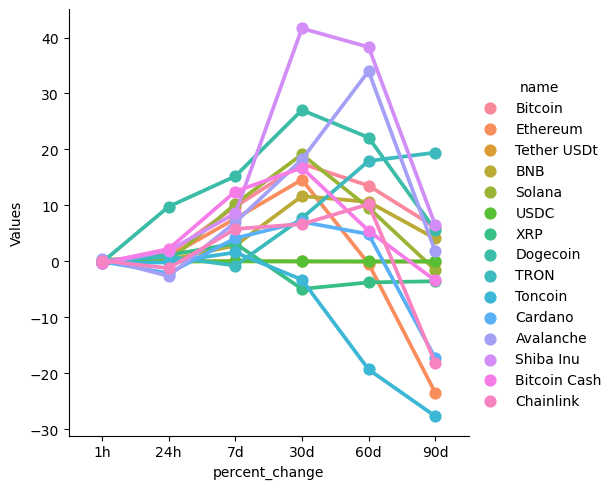

In [109]:
sns.catplot(x = 'percent_change',y='Values',hue = 'name',data=df7, kind='point')

In [113]:
df10 = df3[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,67717.62303,2024-10-16 13:07:00.692678
15,Bitcoin,67717.62303,2024-10-16 13:07:11.010801
30,Bitcoin,67717.62303,2024-10-16 13:07:21.211989
45,Bitcoin,67717.62303,2024-10-16 13:07:31.502201
60,Bitcoin,67717.62303,2024-10-16 13:07:46.148894
75,Bitcoin,67750.48953,2024-10-16 13:08:49.592379
90,Bitcoin,67753.07535,2024-10-16 13:09:49.967710
105,Bitcoin,67756.58441,2024-10-16 13:10:50.304427
120,Bitcoin,67712.44701,2024-10-16 13:11:50.606314


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/z7/57_rzbhs77z85ck8djjbm76w0000gn/T/ipykernel_69805/1376239796.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(axes.get_xticklabels(), rotation=45)


[Text(0, 0, '2024-10-16 13:07:00.692678'),
 Text(1, 0, '2024-10-16 13:07:11.010801'),
 Text(2, 0, '2024-10-16 13:07:21.211989'),
 Text(3, 0, '2024-10-16 13:07:31.502201'),
 Text(4, 0, '2024-10-16 13:07:46.148894'),
 Text(5, 0, '2024-10-16 13:08:49.592379'),
 Text(6, 0, '2024-10-16 13:09:49.967710'),
 Text(7, 0, '2024-10-16 13:10:50.304427'),
 Text(8, 0, '2024-10-16 13:11:50.606314')]

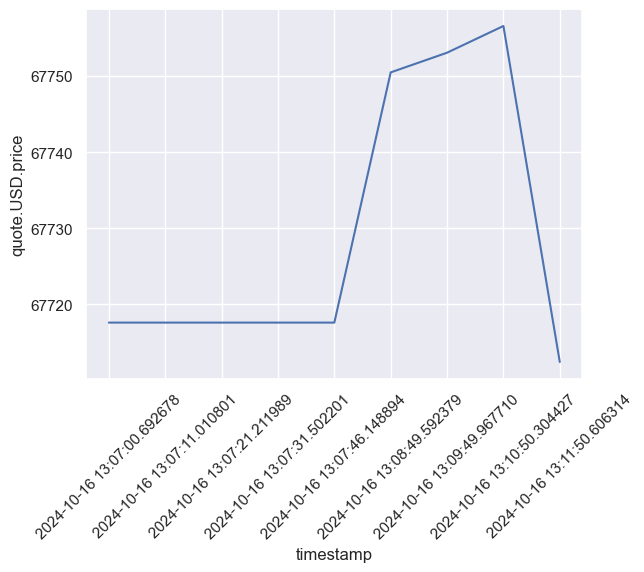

In [123]:
sns.set_theme(style='darkgrid')
axes = sns.lineplot(x='timestamp',y = 'quote.USD.price', data=df10)
axes.set_xticklabels(axes.get_xticklabels(), rotation=45)